总样本数: 100
初始权重 (每个): 0.0100

--- 第 1 轮迭代 ---


/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29923 (\N{CJK UNIFIED IDEOGRAPH-74E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/IPython/cor

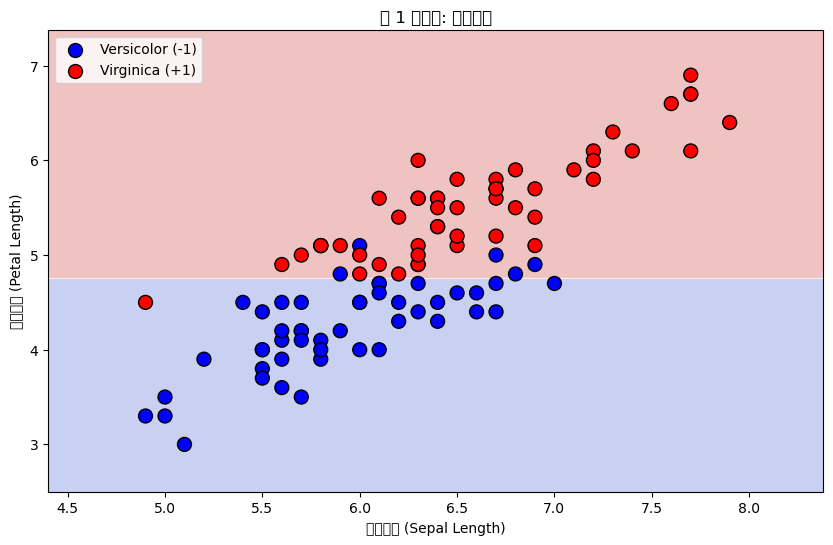

加权错误率 (Error): 0.0700
分类器权重 (Alpha): 1.2933
更新后权重的最大值: 0.0714
更新后权重的最小值: 0.0054

--- 第 2 轮迭代 ---


/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29923 (\N{CJK UNIFIED IDEOGRAPH-74E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jrx/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/IPython/cor

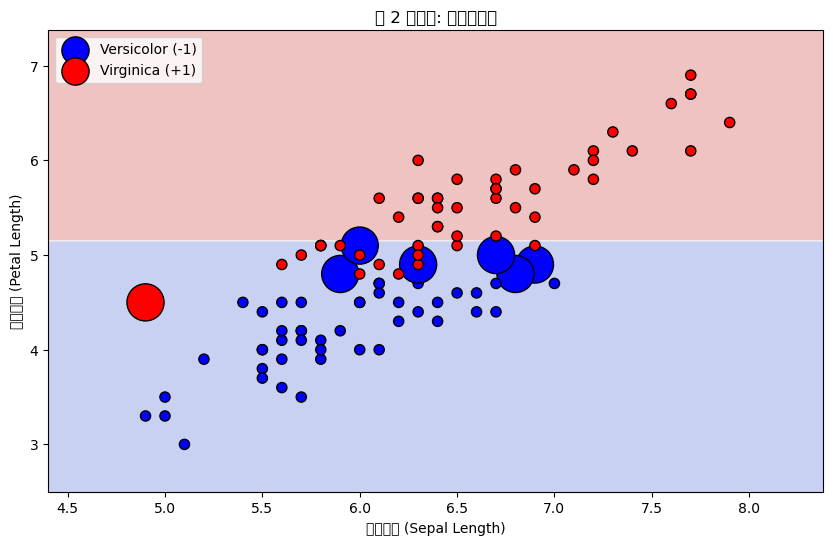

加权错误率 (Error): 0.1521
分类器权重 (Alpha): 0.8592


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# --- 第 0 步：加载和准备数据 (来自您的提示) ---
# 加载 iris 数据集并选择两个类别
iris = load_iris()
X = iris.data[:, [0, 2]]  # 花萼长度 (Sepal Length) 和 花瓣长度 (Petal Length)
y = iris.target
X_ab, y_ab = X[y != 0], y[y != 0]
y_ab[y_ab == 1] = -1  # Versicolor
y_ab[y_ab == 2] = 1   # Virginica

# --- 辅助函数：用于绘制决策边界和数据点 ---
def plot_decision_boundary(clf, X, y, sample_weights, title):
    """
    绘制分类器的决策边界和带有权重大小的数据点。
    """
    # 创建网格来绘制
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 绘制决策边界
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # 绘制数据点
    # 根据样本权重缩放数据点的大小，使其在视觉上更明显
    # 初始权重为 1/n_samples，乘以 n_samples * 100 得到一个合适的基础大小
    scaled_weights = sample_weights * X.shape[0] * 100

    # 绘制 Versicolor (-1)
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', 
                label='Versicolor (-1)', s=scaled_weights[y == -1], edgecolor='k')
    # 绘制 Virginica (+1)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', 
                label='Virginica (+1)', s=scaled_weights[y == 1], edgecolor='k')

    plt.xlabel('花萼长度 (Sepal Length)')
    plt.ylabel('花瓣长度 (Petal Length)')
    plt.title(title)
    plt.legend()
    plt.show()

# --- 您的代码开始 ---
# 初始化权重
n_samples = X_ab.shape[0]
sample_weights = np.full(n_samples, (1 / n_samples))
print(f"总样本数: {n_samples}")
print(f"初始权重 (每个): {1/n_samples:.4f}")

# --- 第 1 轮迭代 ---
print("\n--- 第 1 轮迭代 ---")
# 1. 在 X_ab, y_ab 上训练一个决策树桩 (stump1)，使用 'sample_weight = sample_weights'
stump1 = DecisionTreeClassifier(max_depth=1, random_state=42)
stump1.fit(X_ab, y_ab, sample_weight=sample_weights)

# 2. 绘制数据点和 stump1 的决策边界
# 注意：此时所有点的 's' (大小) 都是相同的
plot_decision_boundary(stump1, X_ab, y_ab, sample_weights, "第 1 轮迭代: 权重均等")

# 3. 计算加权错误 'error1' 和分类器权重 'alpha1'
y_pred1 = stump1.predict(X_ab)
misclassified1 = (y_pred1 != y_ab)

# 计算加权错误率
error1 = np.sum(sample_weights[misclassified1])

# 计算此分类器的权重 (alpha)
# (增加一个极小值 epsilon 以避免 error1 为 0 时 log(0) 的数学错误)
epsilon = 1e-10
alpha1 = 0.5 * np.log((1.0 - error1) / (error1 + epsilon))

print(f"加权错误率 (Error): {error1:.4f}")
print(f"分类器权重 (Alpha): {alpha1:.4f}")

# 4. 更新 sample_weights。增加错误分类点的权重。
# 正确分类: y * y_pred = 1,  exp(-alpha)
# 错误分类: y * y_pred = -1, exp(alpha)
update_factor = np.exp(-alpha1 * y_ab * y_pred1)
sample_weights = sample_weights * update_factor

# 5. 归一化新的 sample_weights，使它们总和为 1
sample_weights = sample_weights / np.sum(sample_weights)

# 打印一些更新后的权重信息
print(f"更新后权重的最大值: {np.max(sample_weights):.4f}")
print(f"更新后权重的最小值: {np.min(sample_weights):.4f}")

# --- 第 2 轮迭代 ---
print("\n--- 第 2 轮迭代 ---")
# 6. 在 X_ab, y_ab 上训练一个新的树桩 'stump2'，使用 *更新后* 的 sample_weights
stump2 = DecisionTreeClassifier(max_depth=1, random_state=42)
stump2.fit(X_ab, y_ab, sample_weight=sample_weights)

# 7. 再次绘制数据点，这次使用更新后的权重作为它们的大小
# 
# 
#    绘制 stump2 的决策边界
plot_decision_boundary(stump2, X_ab, y_ab, sample_weights, "第 2 轮迭代: 权重更新后")

# (可选) 打印 stump2 的表现
y_pred2 = stump2.predict(X_ab)
misclassified2 = (y_pred2 != y_ab)
error2 = np.sum(sample_weights[misclassified2]) # 注意：这是用 *更新后* 的权重计算的
alpha2 = 0.5 * np.log((1.0 - error2) / (error2 + epsilon))

print(f"加权错误率 (Error): {error2:.4f}")
print(f"分类器权重 (Alpha): {alpha2:.4f}")